In [5]:
import pandas as pd
import numpy as np

In [6]:
#optimization things

from tqdm.notebook import tqdm
tqdm.pandas()

In [121]:
df=pd.read_csv("IMDB Dataset.csv")
print(df.shape)

df=df.sample(100)
df.head()


(50000, 2)


,review,sentiment
15476,"We had to go to an appointment, so we turned o...",negative
1082,This movie is pathetic in every way possible. ...,negative
27272,"If you like Madonna or not, this movie is hila...",positive
43010,Saw this today with my 8 year old. I thought i...,positive
5075,I had hoped this movie was going to be mildly ...,negative


In [119]:
df.shape

(50000, 2)

In [29]:
# we are going to perform steps on this dataset to make it ready for applying in model

# we will be doing

# data cleaning
# data preprocessing
# EDA
# making new features
# vectorization

In [120]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 39548 to 42789
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     100 non-null    object
 1   sentiment  100 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


# cleaning

In [35]:
# converting to lowercase

df["review"]=df["review"].str.lower()

In [36]:
# removing extra white spaces

df["review"]=df["review"].str.strip()

In [37]:
# removing html
import re

def remove_html(st):
    clean=re.compile("<.*?>")
    return re.sub(clean,"",st)

df["review"]=df["review"].apply(remove_html)

In [38]:
# removing urls

def remove_url(st):
    clean=re.compile("https?://\S+|www\.\S+")
    return re.sub(clean,"",st)

df["review"]=df["review"].apply(remove_url)

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\panka\AppData\Local\Temp\ipykernel_29372\2050914799.py:4: SyntaxWarning: invalid escape sequence '\S'
  clean=re.compile("https?://\S+|www\.\S+")


In [39]:
# removing aposhtrophes

contractions = [
    "i'm",
    "you're",
    "he's",
    "she's",
    "it's",
    "we're",
    "they're",
    "i've",
    "you've",
    "we've",
    "they've",
    "i'd",
    "you'd",
    "he'd",
    "she'd",
    "we'd",
    "they'd",
    "i'll",
    "you'll",
    "he'll",
    "she'll",
    "we'll",
    "they'll",
    "isn't",
    "aren't",
    "wasn't",
    "weren't",
    "haven't",
    "hasn't",
    "hadn't",
    "don't",
    "doesn't",
    "didn't",
    "can't",
    "couldn't",
    "won't",
    "wouldn't",
    "shouldn't",
    "mustn't",
    "what's",
    "where's",
    "when's",
    "who's",
    "how's",
    "that's",
    "there's",
    "y'all"
]

explanations=['i am',
 'you are',
 'he is ',
 'she is ',
 'it is ',
 'we are',
 'they are',
 'i have',
 'you have',
 'we have',
 'they have',
 'i would ',
 'you would ',
 'he would ',
 'she would ',
 'we would ',
 'they would ',
 'i will',
 'you will',
 'he will',
 'she will',
 'we will',
 'they will',
 'is not',
 'are not',
 'was not',
 'were not',
 'have not',
 'has not',
 'had not',
 'do not',
 'does not',
 'did not',
 'cannot',
 'could not',
 'will not',
 'would not',
 'should not',
 'must not',
 'what is ',
 'where is ',
 'when is ',
 'who is ',
 'how is ',
 'that is',
 'there is ',
 'you all']

for i in range(len(contractions)):
    df["review"]=df["review"].str.replace(contractions[i],explanations[i])

In [40]:
df.head()

,review,sentiment
39548,"look, this movie is obscure, brilliant, and a ...",positive
36234,the decoy is one of those independent producti...,negative
17498,perhaps this could be the best movie ever made...,positive
39731,"this is a solid underrated little thriller, th...",positive
13493,"being relatively young, i did not know how bad...",positive


In [123]:
!pip install symspellpy
!wget https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.6 MB 3.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 3.9 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [symspellpy]
   -------------------- ------------------- 1/2 [symspellpy]
   ---------------------------------------- 2/2 [symspellpy]



'wget' is not recognized as an internal or external command,
operable program or batch file.


In [144]:
df.iloc[1,0]=" Thiss is an exmple of badd text"

In [147]:
import language_tool_python
from tqdm import tqdm
tqdm.pandas()

tool = language_tool_python.LanguageTool('en-US')

def correct_with_languagetool(text):
    matches = tool.check(text)
    return language_tool_python.utils.correct(text, matches)

# Apply to DataFrame (test on sample first)
df["review_corrected"] = df["review"].progress_apply(correct_with_languagetool)


ModuleNotFoundError: No java install detected. Please install java to use language-tool-python.

In [139]:
df.head()

,review,sentiment,review_corrected
15476,"We had to go to an appointment, so we turned o...",negative,"We had to go to an appointment, so we turned o..."
1082,Thiss is an exmple of badd text,negative,Thiss is an exmple of badd text
27272,"If you like Madonna or not, this movie is hila...",positive,"If you like Madonna or not, this movie is hila..."
43010,Saw this today with my 8 year old. I thought i...,positive,Saw this today with my 8 year old. I thought i...
5075,I had hoped this movie was going to be mildly ...,negative,I had hoped this movie was going to be mildly ...


In [43]:
# removing punctutation
import string
punctuation=list(string.punctuation)

def removePunc(text):
    for i in range(len(punctuation)):
        text=text.replace(punctuation[i],"")
    return text
    
df["review"]=df["review"].apply(removePunc)

In [44]:
# removing special charecters

def removeSC(st):
    clean=re.compile("\W\s")
    return re.sub(clean,"",st)

df["review"]=df["review"].apply(removeSC)

<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\W'
C:\Users\panka\AppData\Local\Temp\ipykernel_29372\580351626.py:4: SyntaxWarning: invalid escape sequence '\W'
  clean=re.compile("\W\s")


# Preprocessing

In [45]:
# tokenization 
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df["tokenized_review"]=df["review"].progress_apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


  0%|          | 0/100 [00:00<?, ?it/s]

In [46]:
# stop word removal

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
all_stopwords=stopwords.words("english")

def remove_stopWord(lst):
    L=[]
    for word in lst:
        if word not in all_stopwords:
            L.append(word)
    return L

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
df["tokenized_review"]=df["tokenized_review"].apply(remove_stopWord)

In [48]:
df["review"]=df["tokenized_review"].apply(lambda x:" ".join(x))

# Feature Eng / EDA

In [49]:
df["char_length"]=df["review"].str.len()
df["word_length"]=df["tokenized_review"].apply(len)

C:\Users\panka\AppData\Local\Temp\ipykernel_29372\534259501.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sentiment"]=="positive"]["word_length"],hist=False)
C:\Users\panka\AppData\Local\Temp\ipykernel_29372\534259501.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

<Axes: xlabel='word_length', ylabel='Density'>

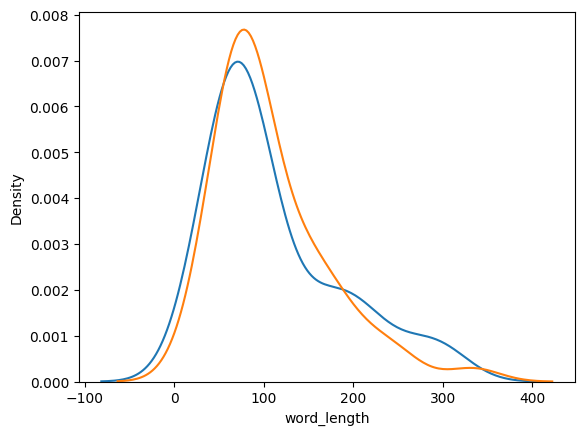

In [50]:
import seaborn as sns

sns.distplot(df[df["sentiment"]=="positive"]["word_length"],hist=False)
sns.distplot(df[df["sentiment"]=="negative"]["word_length"],hist=False)
# if there is diff in distribution then we can say that it will contribute to increase accuracy 
# of mode

C:\Users\panka\AppData\Local\Temp\ipykernel_29372\3148588003.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["sentiment"]=="positive"]["char_length"],hist=False)
C:\Users\panka\AppData\Local\Temp\ipykernel_29372\3148588003.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

<Axes: xlabel='char_length', ylabel='Density'>

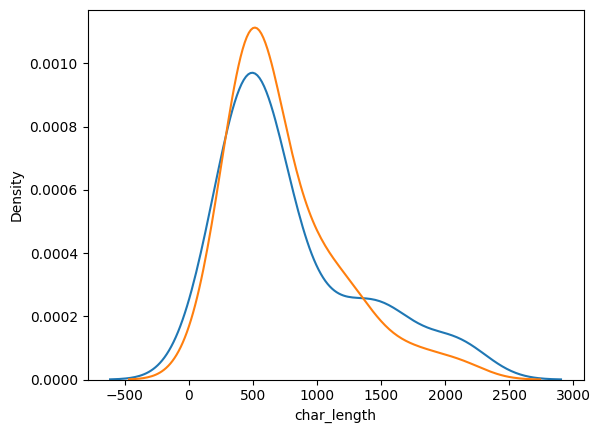

In [51]:

sns.distplot(df[df["sentiment"]=="positive"]["char_length"],hist=False)
sns.distplot(df[df["sentiment"]=="negative"]["char_length"],hist=False)

In [52]:
# above create features are not seemed to be very useful so droping them

In [53]:
#  we can check in a list of negative/positive words how many time it come

posNeg=pd.read_excel("Positive and Negative Word List.xlsx")
negative_wrod_list=posNeg["Negative Sense Word List"].values
positive_wrod_list=posNeg["Positive Sense Word List"].values

negative_wrod_list=[i for i in negative_wrod_list if type(i)==str]
positive_wrod_list=[i for i in positive_wrod_list if type(i)==str]

def countNegative(lst):
    count=0
    for i in lst:
        if i in negative_wrod_list:
            count+=1
    return count
    
def countPositive(lst):
    count=0
    for i in lst:
        if i in positive_wrod_list:
            count+=1
    return count

df["PositiveWordCount"]=df["tokenized_review"].progress_apply(countPositive)
df["NegativeWordCount"]=df["tokenized_review"].progress_apply(countNegative)

In [69]:
# n grams

# ngrams means dividing into groups of n

# eg - my name is pankaj 

# applying 2 grams

# my name , name is , is pankaj 

In [71]:
from nltk import ngrams


pd.Series(ngrams(df[df["sentiment"]=="negative"]["tokenized_review"].sum(),2)).value_counts()

(king, sex)                  8
(year, old)                  7
(ever, seen)                 5
(make, sense)                5
(worst, movie)               5
                            ..
(little, entertainment)      1
(entertainment, succeeds)    1
(succeeds, low)              1
(budget, cringe)             1
(cringe, felt)               1
Name: count, Length: 4930, dtype: int64

In [72]:
pd.Series(ngrams(df[df["sentiment"]=="positive"]["tokenized_review"].sum(),2)).value_counts()

(love, story)           6
(sand, buttock)         4
(get, see)              4
(really, enjoyed)       4
(minds, eye)            4
                       ..
(convoy, spent)         1
(spent, year)           1
(year, daufuskiewhy)    1
(daufuskiewhy, made)    1
(sought, means)         1
Name: count, Length: 5737, dtype: int64

<Figure size 2000x2000 with 0 Axes>

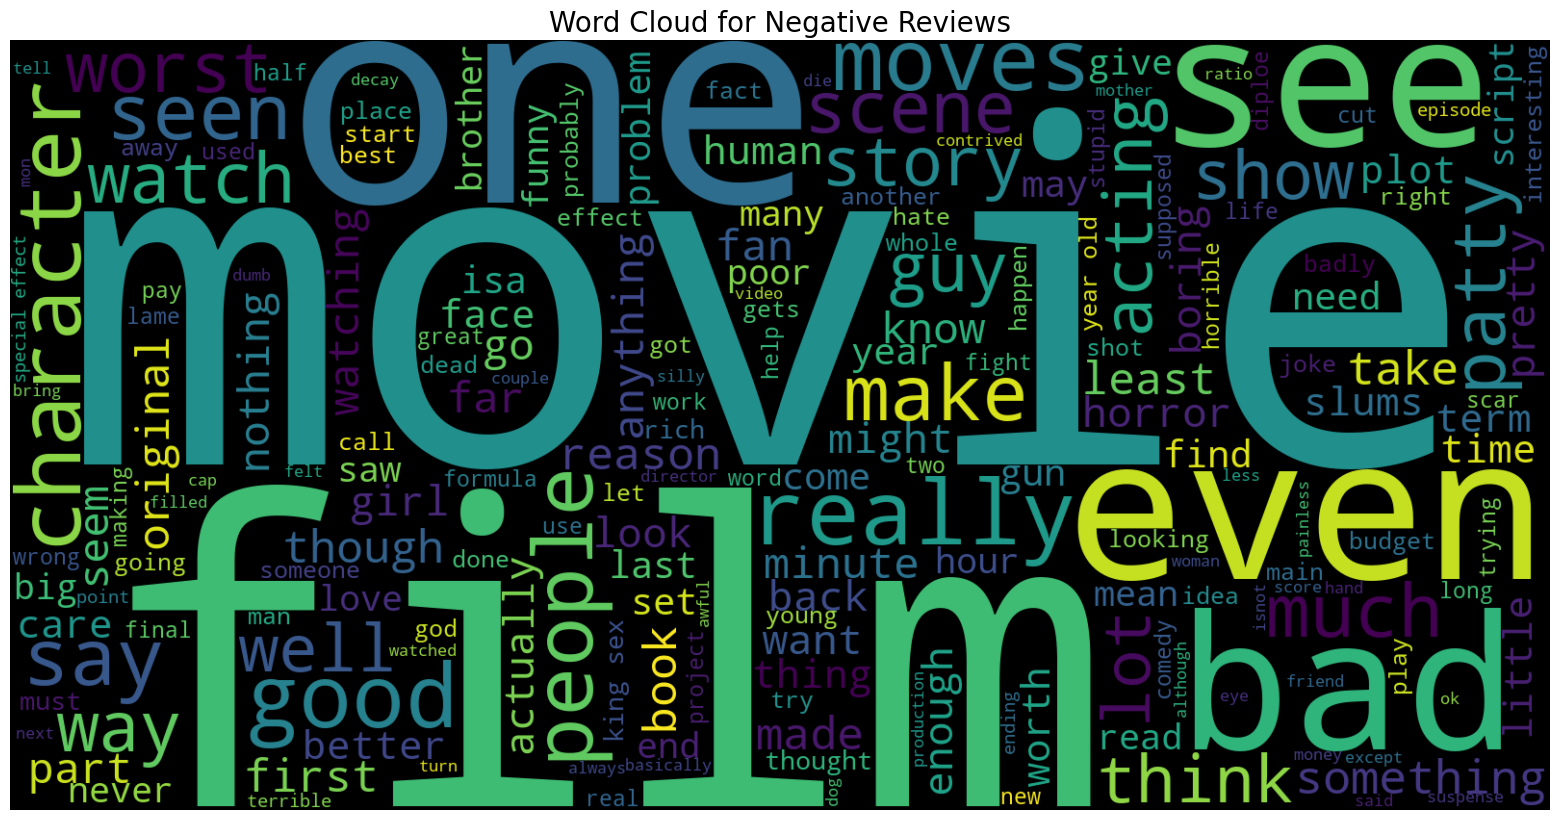

In [65]:
# creating wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
wc=WordCloud(width=1600, height=800).generate(" ".join(df[df["sentiment"]=='negative']['review']))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews", fontsize=20)
plt.show()

<Figure size 2000x2000 with 0 Axes>

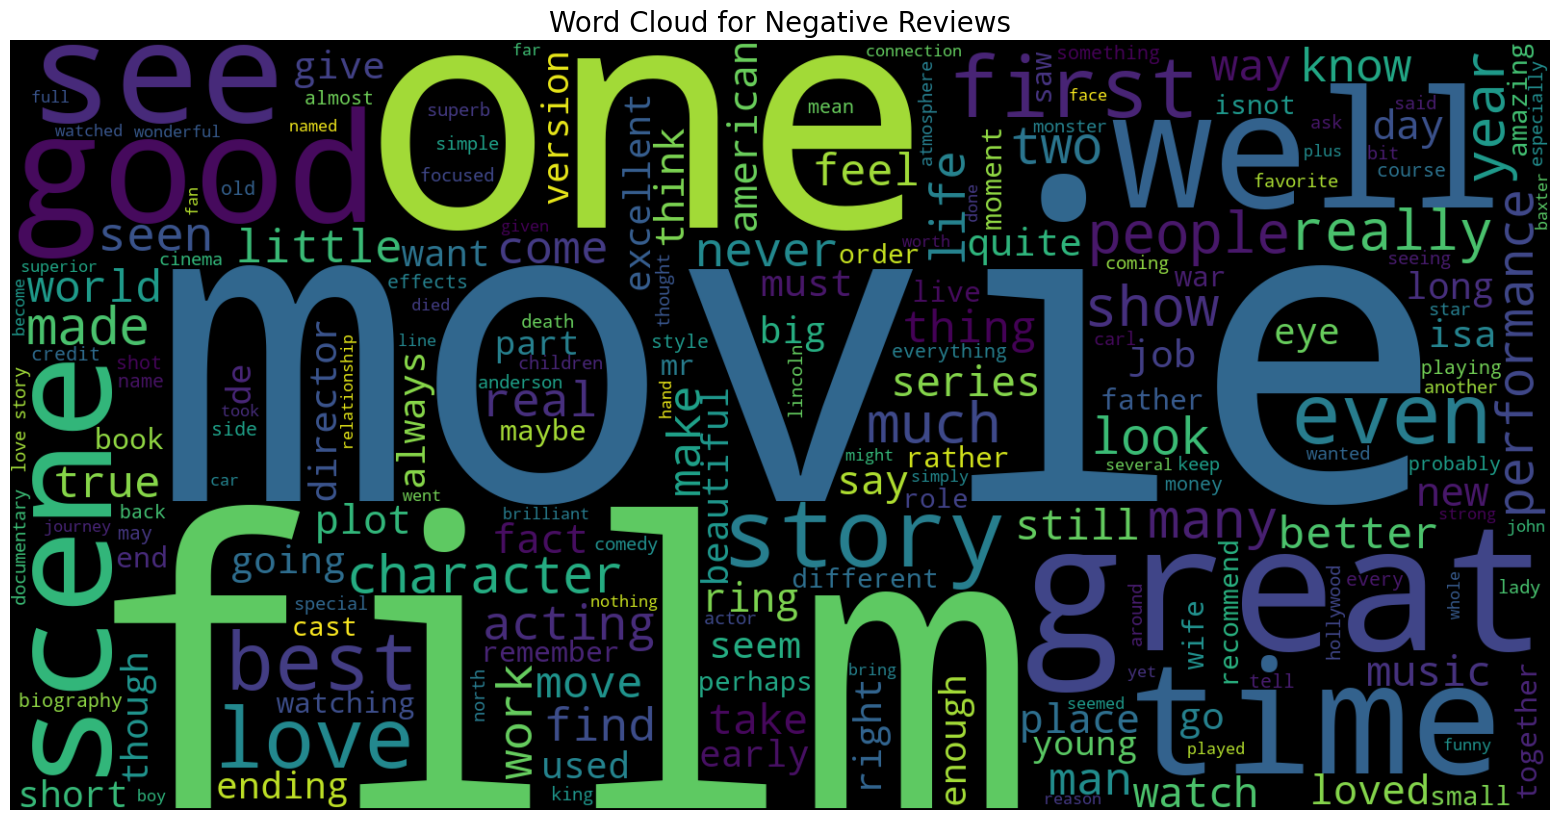

In [66]:
plt.figure(figsize=(20,20))
wc=WordCloud(width=1600, height=800).generate(" ".join(df[df["sentiment"]=='positive']['review']))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews", fontsize=20)
plt.show()

# Vectorization

In [90]:
# i am going to use bag of words for vectorization

from sklearn.feature_extraction.text import CountVectorizer

count_vec=CountVectorizer(max_features=5000,ngram_range=(1,2))
# it will select top 5000 words among unigram and bigram beacuse n_gram_range is from till 2

bag_of_words=count_vec.fit_transform(df['review'])
bag_of_words=pd.DataFrame(bag_of_words.toarray(),columns=count_vec.get_feature_names_out())

In [91]:
df.reset_index(inplace=True,drop=True)
df=pd.concat([df,bag_of_words],axis=1)

In [92]:
df.head()

,review,sentiment,tokenized_review,char_length,word_length,PositiveWordCount,NegativeWordCount,00,00s,10,...,yosemitei,young,younger,younggood,youth,youththis,zero,zone,zoneyou,review
0,look movie obscure brilliant classic sought me...,positive,"[look, movie, obscure, brilliant, classic, sou...",263,40,13,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,decay one independent productions made obvious...,negative,"[decay, one, independent, productions, made, o...",736,103,19,13,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
2,perhaps could best movie ever made isnot iscer...,positive,"[perhaps, could, best, movie, ever, made, isno...",625,94,27,4,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,solid underrated little thrilled thrilla plent...,positive,"[solid, underrated, little, thrilled, thrilla,...",1235,182,70,7,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,relatively young know bad antisemitism brookly...,positive,"[relatively, young, know, bad, antisemitism, b...",487,67,15,7,0,0,0,...,0,1,0,0,0,0,0,0,0,NaN


# Machine learning part

In [95]:
df.drop(['review','tokenized_review'],axis=1,inplace=True)

In [104]:
from sklearn.preprocessing import LabelEncoder
df["sentiment"]=le.fit_transform(df["sentiment"])

In [105]:
df.head()

,sentiment,char_length,word_length,PositiveWordCount,NegativeWordCount,00,00s,10,100,10s,...,york,yosemitei,young,younger,younggood,youth,youththis,zero,zone,zoneyou
0,1,263,40,13,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,736,103,19,13,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,625,94,27,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1235,182,70,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,487,67,15,7,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [109]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:].values,df.iloc[:,0].values,test_size=0.1)


In [112]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression(max_iter=5000)

lg.fit(X_train,y_train)

y_pred=lg.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8